In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from pandas.plotting import scatter_matrix


In [3]:
pd.options.display.max_columns = 99
pd.options.display.max_rows = 99

In [4]:
# df = pd.read_csv('./dataZapImoveis_fortaleza_ce_101pags.csv', encoding='utf-8', sep=';', low_memory=False)
# df = pd.read_csv('./data/dataZapImoveis_fortaleza_ce_200k-800k_101pags.csv', encoding='utf-8', sep=';', low_memory=False)
df = pd.read_csv('./data/dataZAP.csv', encoding='utf-8', sep=';', low_memory=False)

In [6]:
len(df)

35772

In [7]:
df['listing.pricingInfo.salePrice'].value_counts()

normal       26219
3.500.000      173
1.800.000      168
1.200.000      156
2.500.000      147
             ...  
1.570.000        1
915.000          1
657.574          1
845.000          1
2.890.000        1
Name: listing.pricingInfo.salePrice, Length: 854, dtype: int64

### Tratamento dos dados

In [4]:
df = df.drop(['type', 'link.href', 'account.name', 'listing.title', 'listing.description', 'listing.createdAt',
              'listing.updatedAt', 'listing.address.street', 'listing.address.streetNumber',
              'listing.advertiserContact.phones', 'listing.whatsappNumber', 'listing.publicationType',
              'listing.unitSubTypes', 'listing.amenities', 'listing.address.zipCode'], axis="columns")

# 'listing.unitSubTypes' foi excluido pois só possuia aprox 500 entradas

In [5]:
df.head()

,listing.usableAreas,listing.totalAreas,listing.floors,listing.parkingSpaces,listing.address.point.lat,listing.address.point.lon,listing.address.neighborhood,listing.suites,listing.bathrooms,listing.bedrooms,listing.pricingInfo.salePrice,listing.pricingInfo.yearlyIptu,listing.pricingInfo.monthlyCondoFee,listing.unitTypes,listing.usageTypes,listing.pool,listing.sauna,listing.backyard,listing.garden,listing.barbgrill,listing.partyhall,listing.tenniscourt,listing.sportcourt,listing.bathtub,listing.soundproofing,listing.fireplace,listing.gym,listing.hottub,listing.furnished,listing.guestpark,listing.playground,listing.mountainview,listing.balcony,listing.gated_community,listing.closet,listing.whirlpool,listing.air_conditioning,listing.gourmet_balcony
0,93,NaN,NaN,24.0,-3.734560,-38.514512,Aldeota,3.0,3.0,3.0,705.000,NaN,NaN,APARTMENT,RESIDENTIAL,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,62,62.0,NaN,1.0,-3.744216,-38.482066,Cocó,2.0,2.0,2.0,662.491,NaN,NaN,APARTMENT,RESIDENTIAL,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,30,30.0,NaN,1.0,-3.788122,-38.479930,Edson Queiroz,0.0,1.0,1.0,468.000,NaN,NaN,APARTMENT,RESIDENTIAL,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,60,60.0,7.0,2.0,-3.771733,-38.572630,Parangaba,1.0,2.0,3.0,265.000,80.0,330,APARTMENT,RESIDENTIAL,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False
4,66,66.0,NaN,0.0,NaN,NaN,Meireles,0.0,0.0,0.0,650.000,NaN,420,OFFICE,COMMERCIAL,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Multiplica os valores dos preços dos imoveis por 1000 para corrigir o formato float que considerou o "." no valor como o ponto decimal

In [6]:
df['listing.pricingInfo.salePrice'] = df['listing.pricingInfo.salePrice'] * 1000

Remove o ponto da string para converter o tipo

In [7]:
# df['listing.pricingInfo.salePrice'] = df['listing.pricingInfo.salePrice'].str.replace('.', '')
# df['listing.pricingInfo.yearlyIptu'] = df['listing.pricingInfo.yearlyIptu'].str.replace('.', '')
df['listing.pricingInfo.monthlyCondoFee'] = df['listing.pricingInfo.monthlyCondoFee'].str.replace('.', '')

Converte os tipos nas colunas numéricas

In [8]:
# df['listing.pricingInfo.salePrice'] = df['listing.pricingInfo.salePrice'].astype(float)
# df['listing.pricingInfo.yearlyIptu'] = df['listing.pricingInfo.yearlyIptu'].astype(float)
df['listing.pricingInfo.monthlyCondoFee'] = df['listing.pricingInfo.yearlyIptu'].astype(float)

df['listing.bedrooms'] = df['listing.bedrooms'].astype('Int64')
df['listing.bathrooms'] = df['listing.bathrooms'].astype('Int64')
df['listing.suites'] = df['listing.suites'].astype('Int64')
df['listing.usableAreas'] = df['listing.usableAreas'].astype('Int64')
df['listing.totalAreas'] = df['listing.totalAreas'].astype('Int64')
df['listing.floors'] = df['listing.floors'].astype('Int64')
df['listing.parkingSpaces'] = df['listing.parkingSpaces'].astype('Int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   listing.usableAreas                  10000 non-null  Int64  
 1   listing.totalAreas                   7713 non-null   Int64  
 2   listing.floors                       1870 non-null   Int64  
 3   listing.parkingSpaces                9774 non-null   Int64  
 4   listing.address.point.lat            6978 non-null   float64
 5   listing.address.point.lon            6978 non-null   float64
 6   listing.address.neighborhood         10000 non-null  object 
 7   listing.suites                       9488 non-null   Int64  
 8   listing.bathrooms                    9970 non-null   Int64  
 9   listing.bedrooms                     9947 non-null   Int64  
 10  listing.pricingInfo.salePrice        9998 non-null   float64
 11  listing.pricingInfo.yearlyIpt

In [10]:
df.head(10)

,listing.usableAreas,listing.totalAreas,listing.floors,listing.parkingSpaces,listing.address.point.lat,listing.address.point.lon,listing.address.neighborhood,listing.suites,listing.bathrooms,listing.bedrooms,listing.pricingInfo.salePrice,listing.pricingInfo.yearlyIptu,listing.pricingInfo.monthlyCondoFee,listing.unitTypes,listing.usageTypes,listing.pool,listing.sauna,listing.backyard,listing.garden,listing.barbgrill,listing.partyhall,listing.tenniscourt,listing.sportcourt,listing.bathtub,listing.soundproofing,listing.fireplace,listing.gym,listing.hottub,listing.furnished,listing.guestpark,listing.playground,listing.mountainview,listing.balcony,listing.gated_community,listing.closet,listing.whirlpool,listing.air_conditioning,listing.gourmet_balcony
0,93,<NA>,<NA>,24,-3.734560,-38.514512,Aldeota,3,3,3,705000.0,NaN,NaN,APARTMENT,RESIDENTIAL,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,62,62,<NA>,1,-3.744216,-38.482066,Cocó,2,2,2,662491.0,NaN,NaN,APARTMENT,RESIDENTIAL,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,30,30,<NA>,1,-3.788122,-38.479930,Edson Queiroz,0,1,1,468000.0,NaN,NaN,APARTMENT,RESIDENTIAL,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,60,60,7,2,-3.771733,-38.572630,Parangaba,1,2,3,265000.0,80.0,80.0,APARTMENT,RESIDENTIAL,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False
4,66,66,<NA>,0,NaN,NaN,Meireles,0,0,0,650000.0,NaN,NaN,OFFICE,COMMERCIAL,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,250,171,<NA>,2,NaN,NaN,Mondubim,2,3,3,350000.0,311.0,311.0,HOME,RESIDENTIAL,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
6,117,155,<NA>,4,-3.873815,-38.507397,Ancuri,3,3,3,290000.0,NaN,NaN,HOME,RESIDENTIAL,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,68,<NA>,22,2,-3.756312,-38.445897,Praia do Futuro II,1,2,2,300000.0,NaN,NaN,APARTMENT,RESIDENTIAL,True,False,False,True,True,True,False,True,False,False,False,False,False,False,True,True,False,True,True,False,False,True,False
8,116,<NA>,<NA>,2,-3.882424,-38.509071,Pedras,2,3,3,310000.0,1.0,1.0,HOME,RESIDENTIAL,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,74,<NA>,<NA>,2,-3.777765,-38.484067,Engenheiro Luciano Cavalcante,3,3,3,410000.0,1.0,1.0,APARTMENT,RESIDENTIAL,True,False,False,True,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False


Remove todos os imoveis não residenciais e terrenos

In [11]:
# Remove todos os não residenciais
df = df.drop(df[df['listing.usageTypes'] == 'COMMERCIAL'].index)
df = df.drop(df[df['listing.usageTypes'] == 'RESIDENTIAL|COMMERCIAL'].index)

# Remove todos os terrenos
df = df.drop(df[df['listing.unitTypes'] == 'ALLOTMENT_LAND'].index)
df = df.drop(df[df['listing.unitTypes'] == 'RESIDENTIAL_ALLOTMENT_LAND'].index)

Considerando os imoveis com valores nulos e 0 na coluna de quantidade de andares como apenas 1 andar

In [12]:
df['listing.floors'] = df['listing.floors'].fillna(1)
df.loc[df['listing.floors'] == 0] = 1

Considerando os valores nulos para quantidades de vagas de garagem como sem garagem

In [13]:
df['listing.parkingSpaces'] = df['listing.parkingSpaces'].fillna(0)

Considerando os valores nulos para iptu e taxa de condominio como sem iptu e sem taxa de condominio

In [14]:
df['listing.pricingInfo.yearlyIptu'] = df['listing.pricingInfo.yearlyIptu'].fillna(0)
df['listing.pricingInfo.monthlyCondoFee'] = df['listing.pricingInfo.monthlyCondoFee'].fillna(0)

Considerando os valores de area total nulos como sendo iguais a area util

In [15]:
df['listing.totalAreas'] = df['listing.totalAreas'].fillna(df['listing.usableAreas'])

Considerando os valores de suite nulos como não possuindo suite

In [16]:
df['listing.suites'] = df['listing.suites'].fillna(0)

Remove todos os valores que não possuem informação de latitude e longitude

In [17]:
df.dropna(subset=['listing.address.point.lat'], inplace=True)

<Axes: >

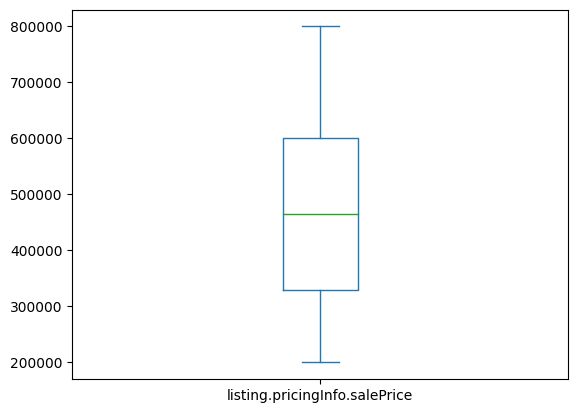

In [18]:
# Remove todos os imoveis com preços abaixo de R$200.000 já que não representam o valor real do imovel no anuncio e sim algum erro do ZAP
df = df.drop(df[df['listing.pricingInfo.salePrice'] < 200000].index)

# Remove imoveis sem preço
df.dropna(subset=['listing.pricingInfo.salePrice'], inplace=True)

df.plot(kind='box', y='listing.pricingInfo.salePrice')

In [19]:

# # Remove alguns pontos que estavam com as coordenadas erradas
# df = df.drop(df[df['listing.address.point.lat'] < -5].index)
# df = df.drop(df[df['listing.address.point.lat'] > 0].index)
df = df.drop(df[df['listing.totalAreas'] > 1500].index)
df = df.drop(df[df['listing.usableAreas'] > 2000].index)

# Remove imoveis com quantidades absurdas de banheiros de vagas de garagem que devem ser erros no anuncio no ZAP
df = df.drop(df[df['listing.bathrooms'] > 10].index)
df = df.drop(df[df['listing.parkingSpaces'] > 10].index)

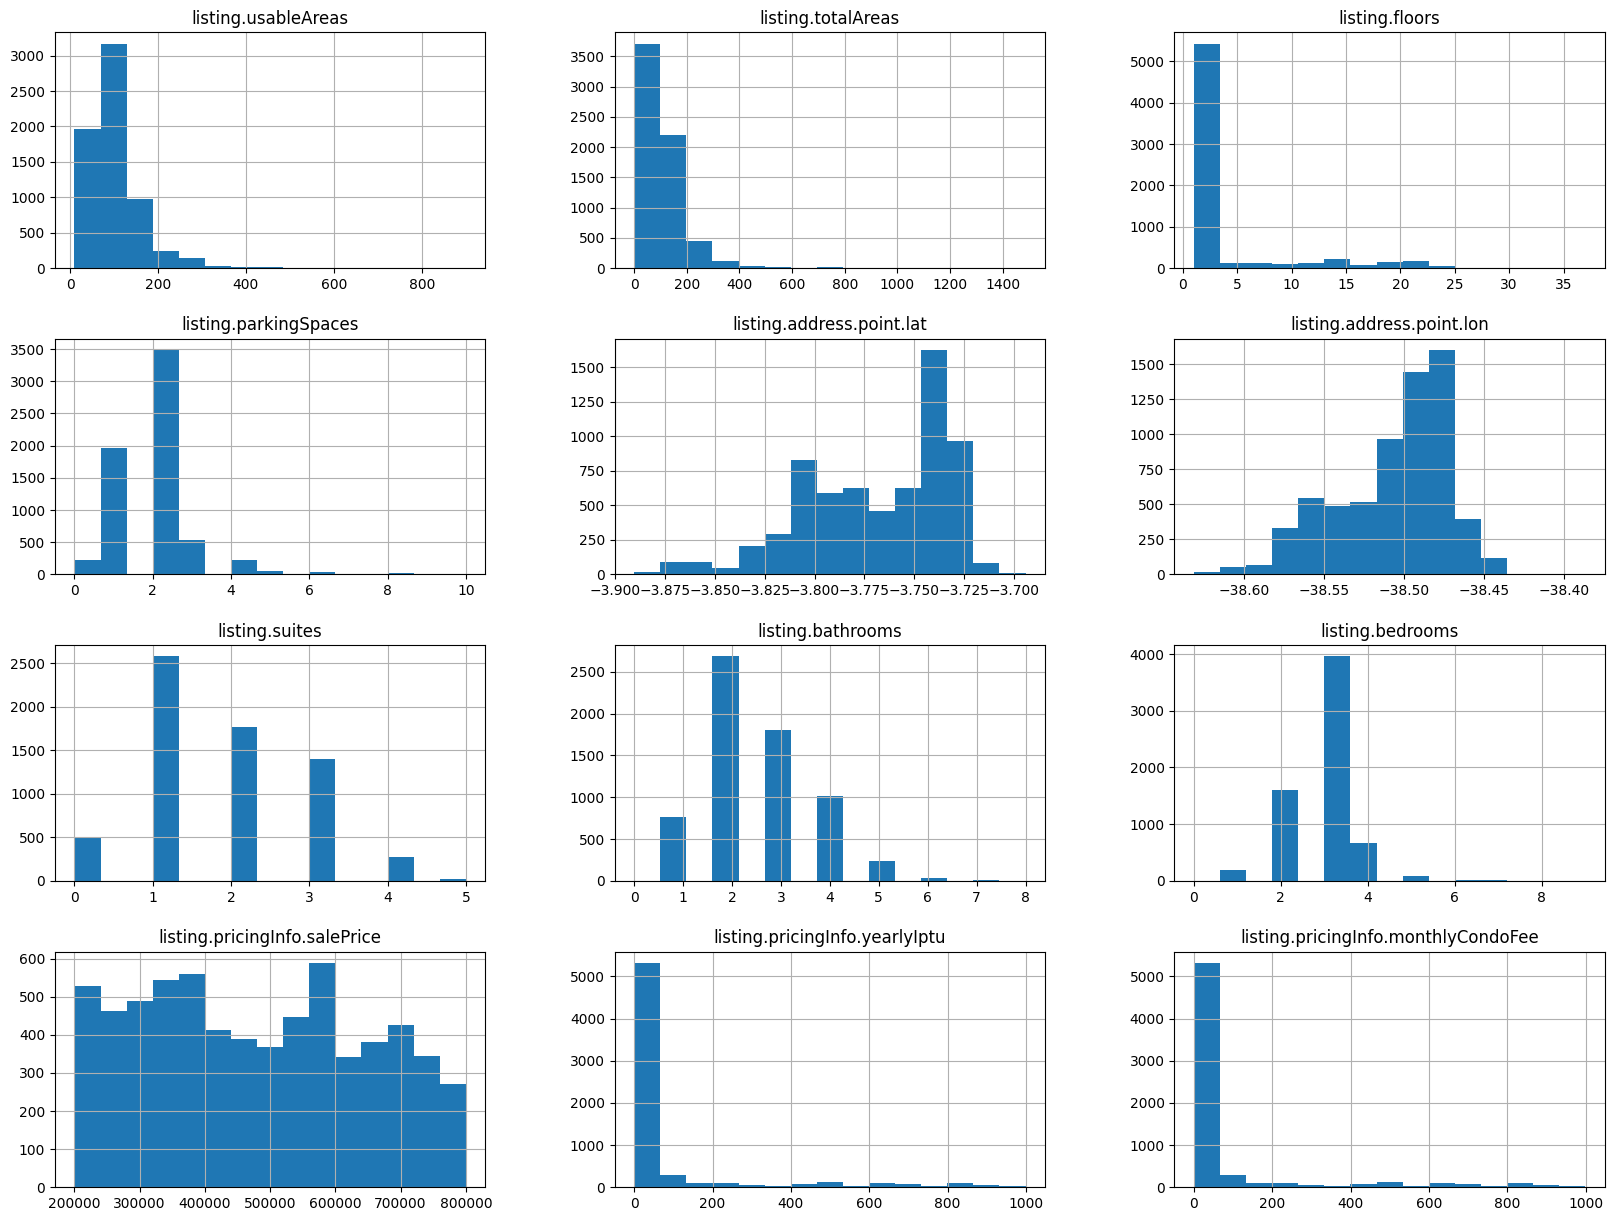

In [20]:
df.hist(figsize=(20,15), bins=15)
plt.show()

### Criação de sets de teste e treinamento

Criação de sets com split aleatório

In [21]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

Criação de sets com split estratificado

In [22]:
df['group.usableAreas'] = pd.cut(df['listing.usableAreas'], 
                                   bins=[0, 100, 200, 300, 400, 500, np.inf],
                                   labels=[1, 2, 3, 4, 5, 6])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['group.usableAreas']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]
    
for _set in (strat_train_set, strat_test_set):
    _set.drop('group.usableAreas', axis=1, inplace=True)

/tmp/ipykernel_5539/2439356467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _set.drop('group.usableAreas', axis=1, inplace=True)
/tmp/ipykernel_5539/2439356467.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _set.drop('group.usableAreas', axis=1, inplace=True)


### Exploração e análise dos dados

Visualização geografica dos dados

<Axes: xlabel='listing.address.point.lon', ylabel='listing.address.point.lat'>

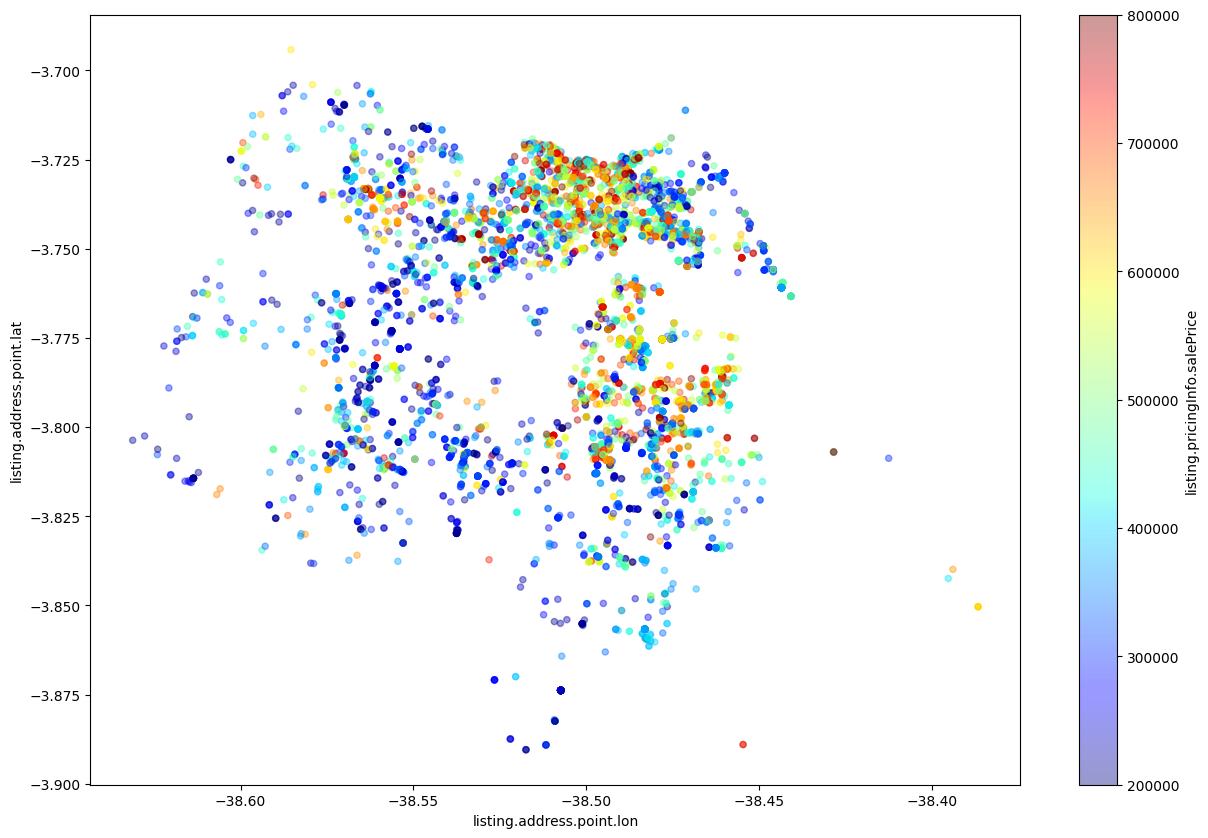

In [23]:
df.plot(kind='scatter', x='listing.address.point.lon', 
        y='listing.address.point.lat',
        alpha=0.4, 
        c='listing.pricingInfo.salePrice',
        figsize=(15,10), 
        cmap=plt.get_cmap('jet'))

Procurando correlações

In [24]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['listing.pricingInfo.salePrice'].sort_values(ascending=False)

listing.pricingInfo.salePrice          1.000000
listing.suites                         0.479070
listing.bathrooms                      0.416332
listing.parkingSpaces                  0.370440
listing.usableAreas                    0.300777
listing.address.point.lon              0.260658
listing.address.point.lat              0.255193
listing.bedrooms                       0.222036
listing.totalAreas                     0.201402
listing.floors                         0.106753
listing.pricingInfo.yearlyIptu        -0.115479
listing.pricingInfo.monthlyCondoFee   -0.115479
Name: listing.pricingInfo.salePrice, dtype: float64

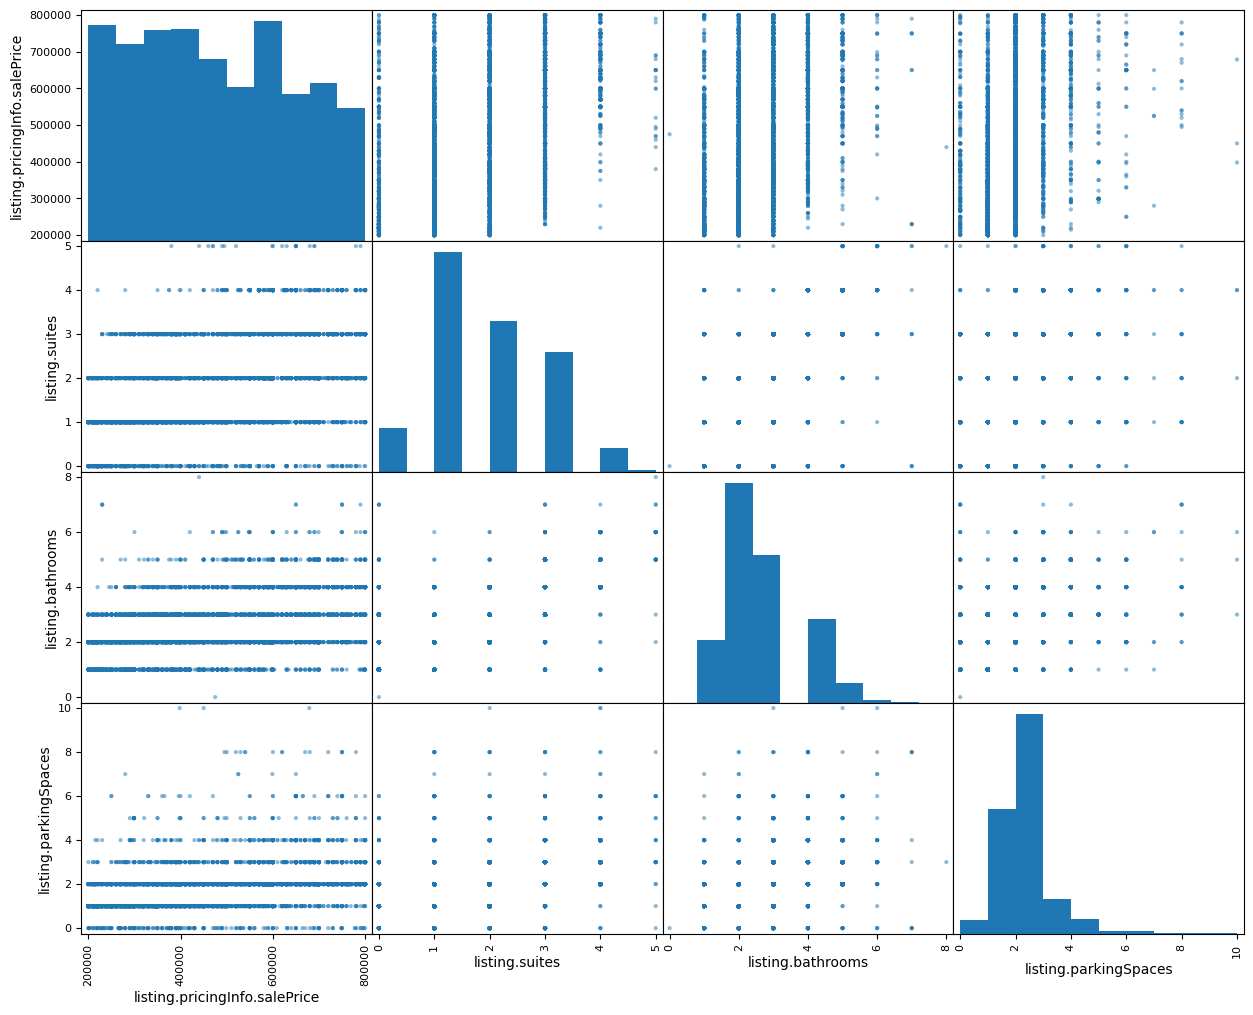

In [25]:
attribs = ['listing.pricingInfo.salePrice', 'listing.suites', 'listing.bathrooms', 'listing.parkingSpaces']
scatter_matrix(df[attribs], figsize=(15,12))
plt.show()

In [26]:
df['suites_per_usableArea'] = df['listing.suites'] / df['listing.usableAreas']
df['bedrooms_per_usableArea'] = df['listing.bedrooms'] / df['listing.usableAreas']
df['bathrooms_per_bedrooms'] =  df['listing.bathrooms'] / df['listing.bedrooms']

corr_matrix = df.corr(numeric_only=True)
corr_matrix['listing.pricingInfo.salePrice'].sort_values(ascending=False)

listing.pricingInfo.salePrice          1.000000
listing.suites                         0.479070
listing.bathrooms                      0.416332
listing.parkingSpaces                  0.370440
bathrooms_per_bedrooms                 0.318971
listing.usableAreas                    0.300777
listing.address.point.lon              0.260658
listing.address.point.lat              0.255193
suites_per_usableArea                  0.235168
listing.bedrooms                       0.222036
listing.totalAreas                     0.201402
listing.floors                         0.106753
listing.pricingInfo.yearlyIptu        -0.115479
listing.pricingInfo.monthlyCondoFee   -0.115479
bedrooms_per_usableArea               -0.352842
Name: listing.pricingInfo.salePrice, dtype: float64

<Axes: >

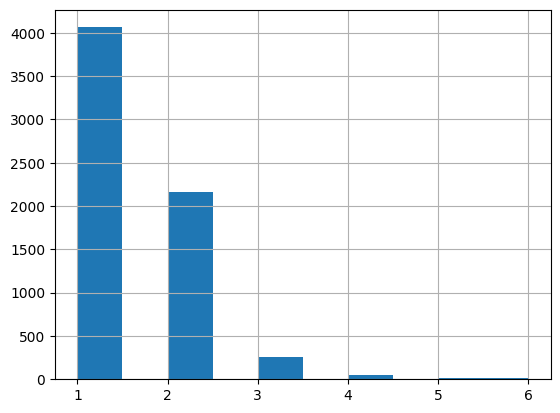

In [27]:
df['group.usableAreas'].hist()

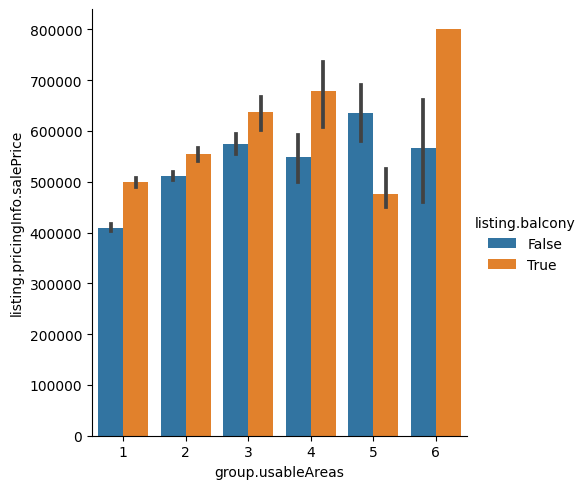

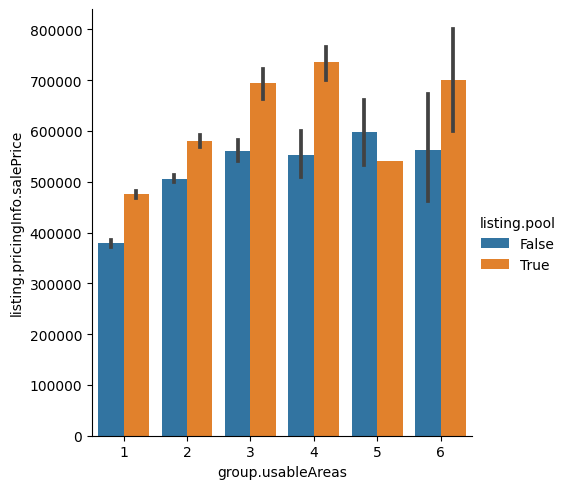

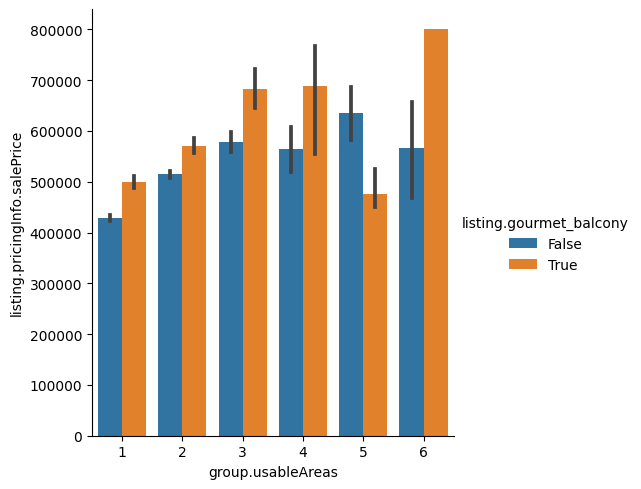

In [28]:
sns.catplot(data=df,kind='bar', x='group.usableAreas', y='listing.pricingInfo.salePrice', hue='listing.balcony')
sns.catplot(data=df,kind='bar', x='group.usableAreas', y='listing.pricingInfo.salePrice', hue='listing.pool')
sns.catplot(data=df,kind='bar', x='group.usableAreas', y='listing.pricingInfo.salePrice', hue='listing.gourmet_balcony')

### Preparando os dados para algoritmos de 

In [29]:
df = strat_train_set.drop('listing.pricingInfo.salePrice', axis=1)
df_labels = strat_train_set['listing.pricingInfo.salePrice'].copy()

Separando duas listas com as colunas numéricas e colunas categoricas

In [30]:
num_attribs = list(df.select_dtypes(include=[np.number]))
cat_attribs = list(df.select_dtypes(exclude=[np.number]))

Pipelines

In [31]:
# Pipeline colunas numéricas
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

# Pipeline colunas categóricas
cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder())
])

# Pipeline completa
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

df_prepared = full_pipeline.fit_transform(df)

### Selecionando e treinando um modelo

Regressão Linear (RL)

In [32]:
def display_scores(scores):
    print('Scores:', scores)
    print("Média:", scores.mean())
    print("Desvio padrão:", scores.std())
    
def linear_prediction_plot(prediction, true_value):
    plt.scatter(prediction, true_value, alpha=0.2)
    plt.xlabel('Predição')
    plt.ylabel('Valor real')
    
    plt.plot([prediction.min(), true_value.max()], [prediction.min(), true_value.max()], 'k--')

RMSE Lin:  102277.11557474348
Scores: [107738.78957516 107376.34919154 108435.15153782 105092.07868497
 110405.29357182 103884.85395333 106709.69452686 103271.24196003
 106050.72752582 107324.57723288]
Média: 106628.87577602416
Desvio padrão: 2032.3504160466073


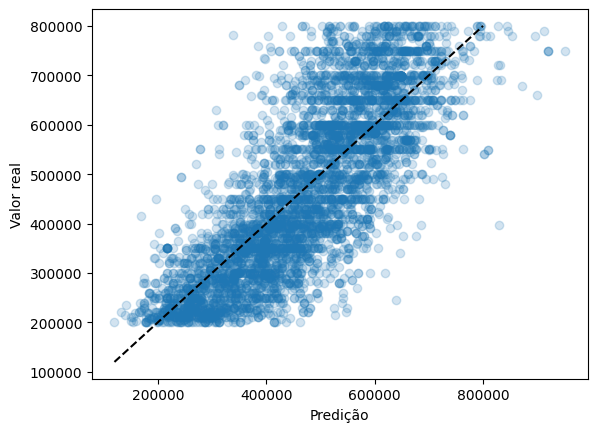

In [33]:
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_scores = cross_val_score(lin_reg, df_prepared, df_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print("RMSE Lin: ", lin_rmse)
display_scores(lin_rmse_scores)

linear_prediction_plot(df_predictions, df_labels)

# Média ~R$106.500 e RMSE ~R$102.000, ou seja, o modelo de regressão linear está "underfitting"

Regressão Logística (RLog)

K Nearest Neighbor (KNN)

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(df_prepared, df_labels)

df_predictions = knn_reg.predict(df_prepared)
knn_mse = mean_squared_error(df_labels, df_predictions)
knn_rmse = np.sqrt(knn_mse)

knn_scores = cross_val_score(knn_reg, df_prepared, df_labels, scoring='neg_mean_squared_error', cv=10)
knn_rmse_scores = np.sqrt(-knn_scores)

print(knn_rmse)
display_scores(knn_rmse_scores)

linear_prediction_plot(df_predictions, df_labels)

# Média ~R$104.000 e RMSE ~R$82.000, ou seja, o modelo de regressão linear está "underfitting"

KeyboardInterrupt: 

Decision Tree (Árvore)

RMSE Tree: 1631.6284103156613
Scores: [ 98287.92219169  99050.63714893  99214.15173223 106224.13136012
 113706.95900233 105714.44165615 101142.97756757 109143.37925153
 101909.23595713 109768.35886008]
Média: 104416.21947277608
Desvio padrão: 5026.622044327481


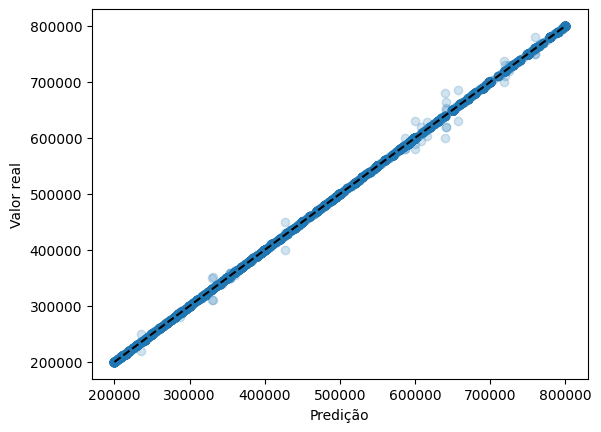

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_prepared, df_labels)

df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_scores = cross_val_score(tree_reg, df_prepared, df_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

print("RMSE Tree:", tree_rmse)
display_scores(tree_rmse_scores)

linear_prediction_plot(df_predictions, df_labels)

# Média ~R$104.000 e RMSE R$1.631, ou seja, o modelo de árvore está "overfitting"

Random Forest

28623.527862496656
Scores: [78830.45128644 73330.71546009 75748.72548171 80856.73792935
 82787.41714737 79120.54808312 68989.63239002 78557.29170496
 75872.02200602 76596.31443388]
Média: 77068.98559229673
Desvio padrão: 3731.27445662075


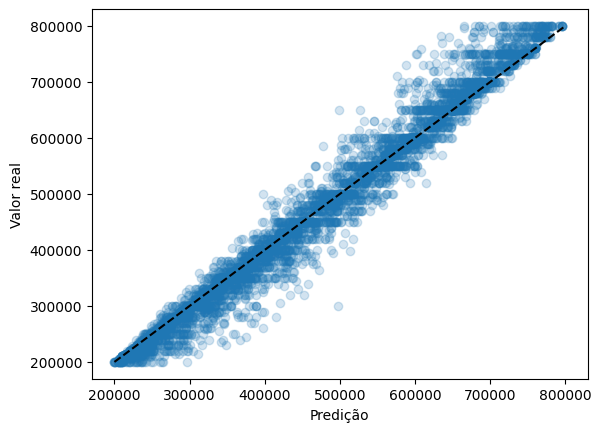

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Com o modelo de RandomForest o score foi melhor mas ainda está overfitting

forest_reg = RandomForestRegressor()
forest_reg.fit(df_prepared, df_labels)

df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_scores = cross_val_score(forest_reg, df_prepared, df_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print(forest_rmse)
display_scores(forest_rmse_scores)

linear_prediction_plot(df_predictions, df_labels)